In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import graphviz
import time
from sklearn import metrics
df=pd.read_csv("C:/Users/MB20705/Desktop/data mining/iris.data.csv",names=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","classes"])
df

sepal length in cm  sepal width in cm  petal length in cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal width in cm         classes  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3                  0.2     Iris-setosa  
4                  0.2     Iris-setosa  
..                 ...             ...  
145                2.3  Iris-virginica  
146                1.9  Iris-virginica  
147                2.0  Iris-virginica  
148                2.3  Iris-virginica  
149                1.8  Iris-virginica  

[150 rows x 5 columns]

# 資料前處理

In [2]:
#刪除重複和問號的值
print("原始比數：",df.shape)
df.drop_duplicates(inplace=True)
print("刪除重複的值後：",df.shape)


df_X=df.drop(['classes'], axis=1)
outcome=list(df.columns[4:5])
df_y=df[outcome]
df_y

原始比數： (150, 5)
刪除重複的值後： (147, 5)


classes
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[147 rows x 1 columns]

In [3]:
# normalize_columns=df_X.columns
# def normalize(columns):
#   scaler = preprocessing.StandardScaler()
#   df_X[columns] = scaler.fit_transform(df_X[columns])

# normalize(normalize_columns)

le = LabelEncoder()
df_y["classes"]= le.fit_transform(df_y["classes"])
df_y

C:\Users\MB20705\AppData\Local\Temp\ipykernel_2740\799607503.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y["classes"]= le.fit_transform(df_y["classes"])


classes
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[147 rows x 1 columns]

# 模型

## K-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
kmeans_start=time.time()
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_X)
kmeans_pred_y = kmeans.predict(df_X)
kmeans_end=time.time()

## 階層式分群

In [5]:
Hierarchical_start=time.time()
Hierarchical=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Hierarchical_pred_y = Hierarchical.fit_predict(df_X)
Hierarchical_end=time.time()
Hierarchical_pred_y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

## DBSCN分群

In [6]:
DBSCAN_start=time.time()
DBSCAN_cluster= DBSCAN(eps=0.65, min_samples=8)
DBSCAN_pred_y=DBSCAN_cluster.fit_predict(df_X)
DBSCAN_end=time.time()
print(df_y)
# print(DBSCAN_pred_y)
# for i,j in enumerate(DBSCAN_pred_y):
#     if(j==1):
#         DBSCAN_pred_y[i]=2
#     if(j==-1):
#         DBSCAN_pred_y[i]=1        
# DBSCAN_pred_y

     classes
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[147 rows x 1 columns]


# 評估績效

In [7]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# 算純度和執行時間

In [8]:
print('kmeans purity',purity_score(df_y,kmeans_pred_y ))
print('Hierarchica purity',purity_score(df_y,Hierarchical_pred_y))
print('DBSCAN purity',purity_score(df_y,DBSCAN_pred_y))
print('kmeans執行時間',kmeans_end-kmeans_start)
print('Hierarchical執行時間',Hierarchical_end-Hierarchical_start)
print('DBSCAN執行時間',DBSCAN_end-DBSCAN_start)

kmeans purity 0.8979591836734694
Hierarchica purity 0.8979591836734694
DBSCAN purity 0.6938775510204082
kmeans執行時間 0.2648751735687256
Hierarchical執行時間 0.024079322814941406
DBSCAN執行時間 0.0060198307037353516


# visualize function

In [9]:
#Importing required modules
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
def PCA_fiture(x,label,title):  
 #Load Data
 pca = PCA(2)
 
 #Transform the data
 x = pca.fit_transform(x)
 
 #Import KMeans module
 from sklearn.cluster import KMeans
 
 #Getting unique labels
 u_labels = np.unique(label)

 #plotting the results:
 for i in u_labels:
  plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i)
 plt.legend()
 plt.title(title)
 plt.show()
# print(u_labels)

# show

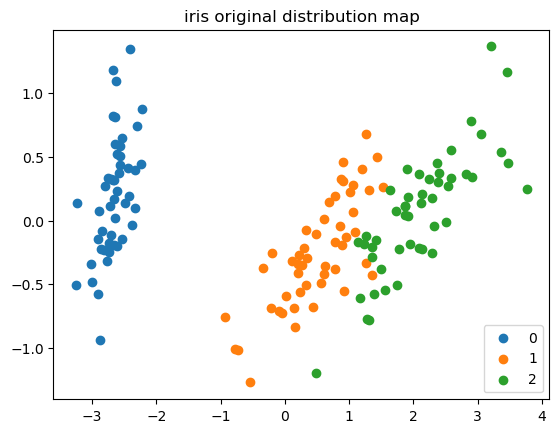

In [10]:
df_ini_y=[]
type(df_ini_y)  
for i in df_y['classes']:
  df_ini_y.append(i)
PCA_fiture(df_X,df_ini_y,"iris original distribution map")

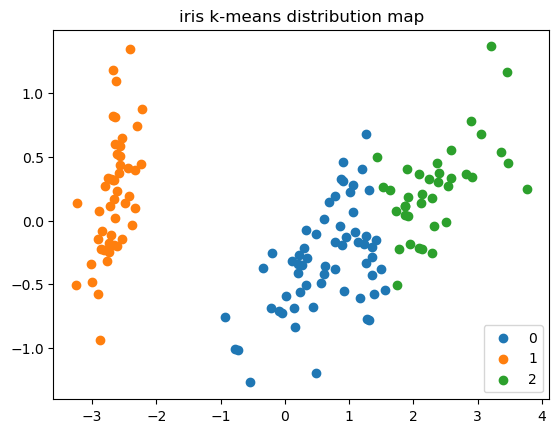

In [11]:
PCA_fiture(df_X,kmeans_pred_y,"iris k-means distribution map")

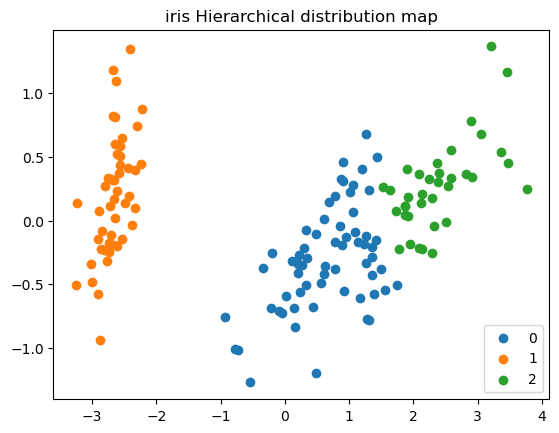

In [12]:
PCA_fiture(df_X,Hierarchical_pred_y,"iris Hierarchical distribution map")

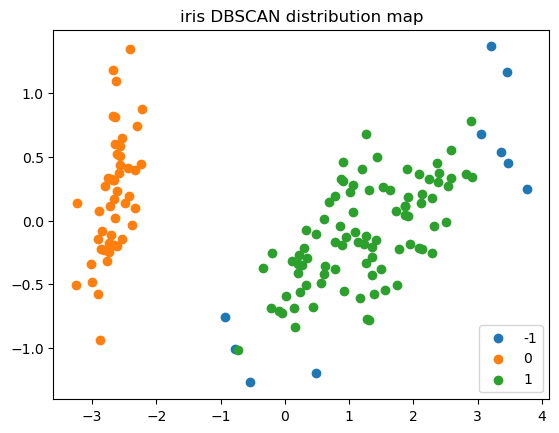

In [13]:
PCA_fiture(df_X,DBSCAN_pred_y,"iris DBSCAN distribution map")

In [14]:
import scipy.cluster.hierarchy as shc 
from matplotlib import pyplot 
pyplot.figure(figsize=(20, 20))   
pyplot.title(" orignal iris Dendrograms")   
dend = shc.dendrogram(shc.linkage(df_X, method ='ward'))

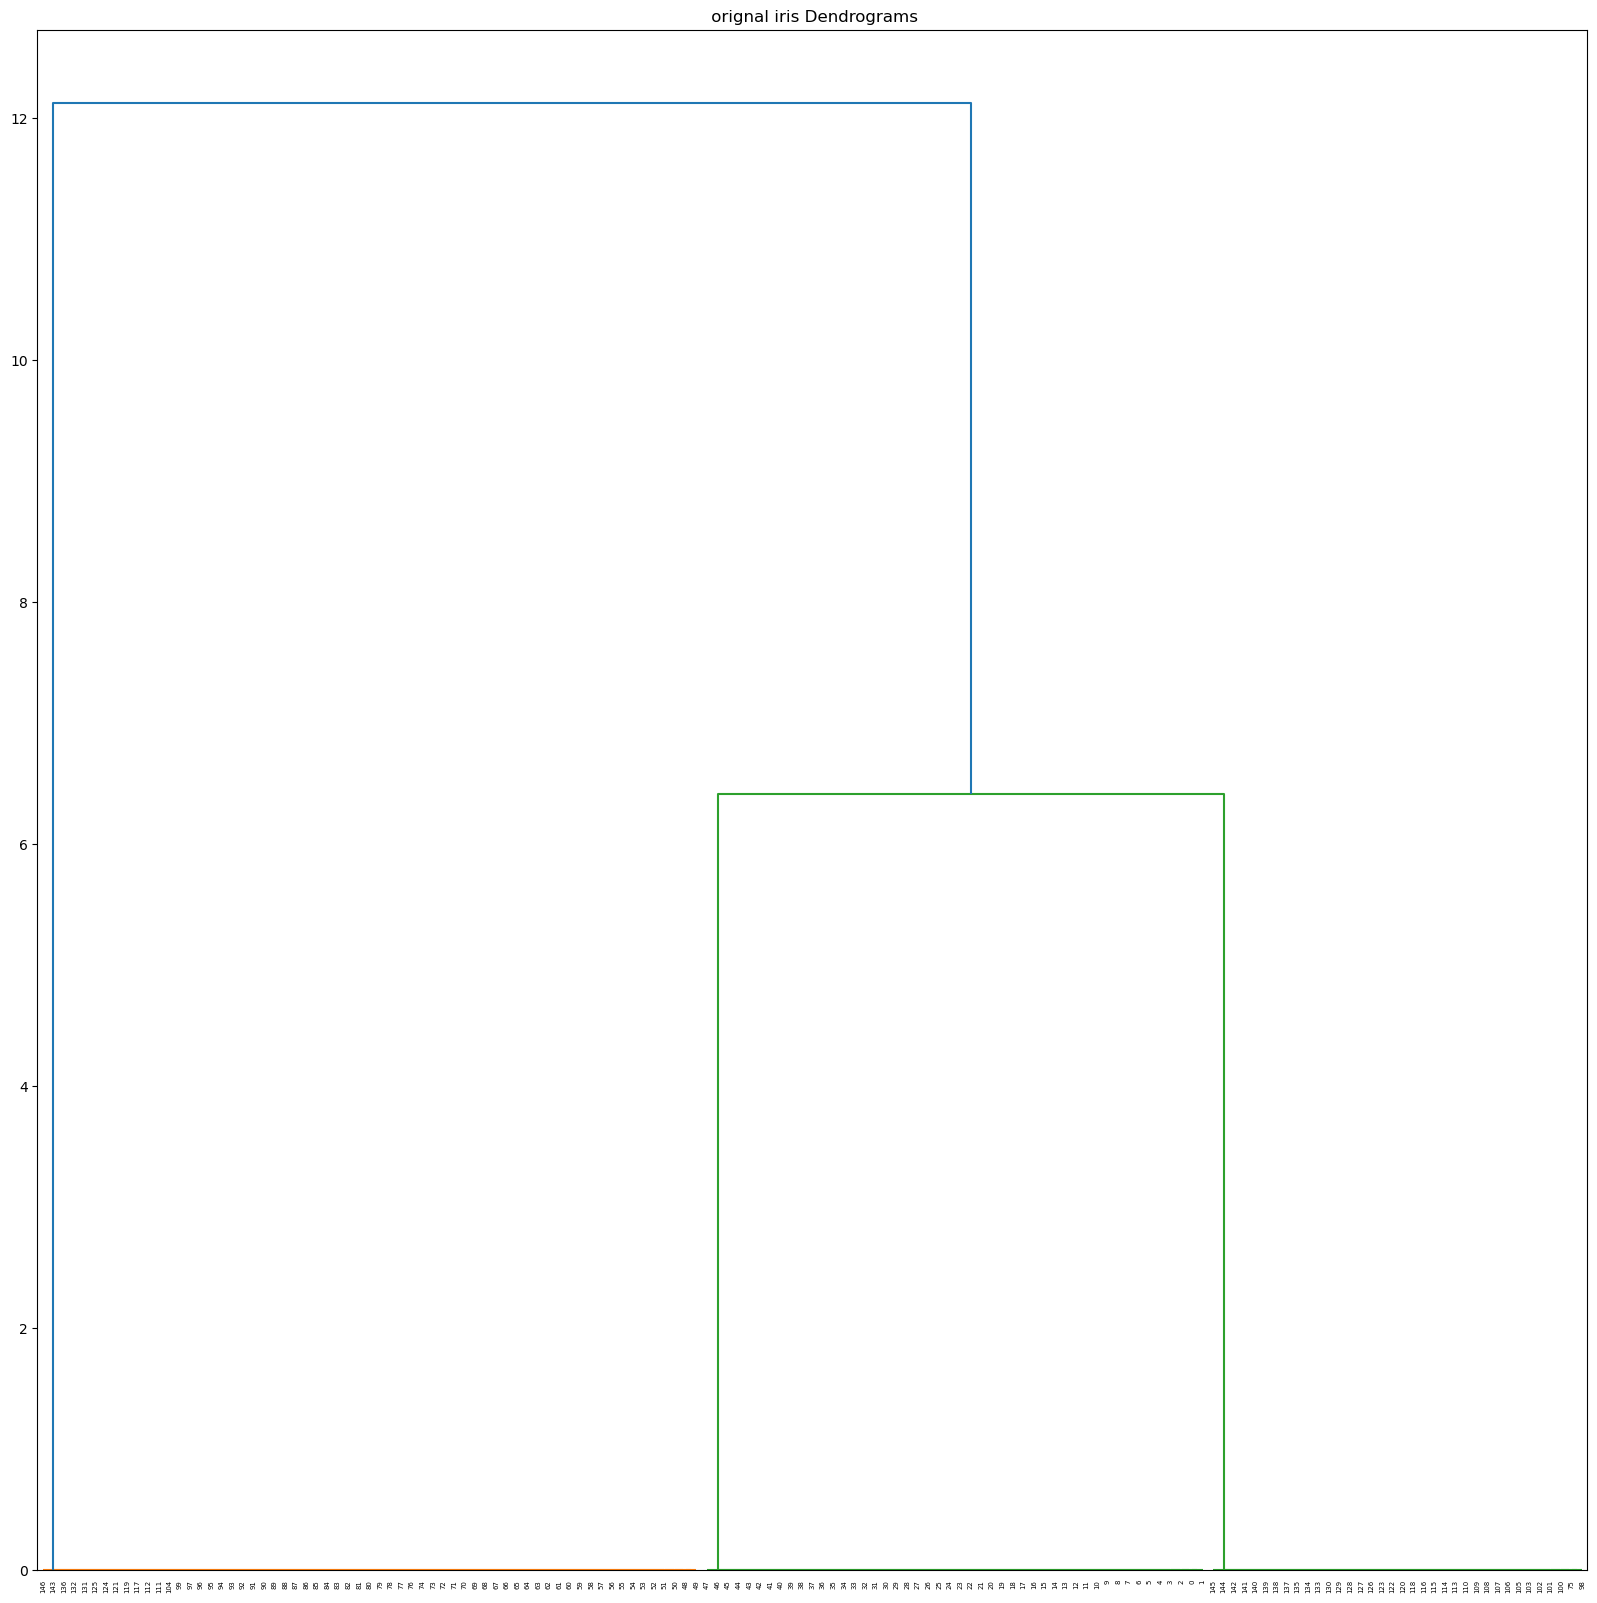

In [15]:
import scipy.cluster.hierarchy as shc 
from matplotlib import pyplot 
X = [[i] for i in Hierarchical_pred_y]
pyplot.figure(figsize=(20, 20))   
pyplot.title(" orignal iris Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method ='ward'))


In [20]:
decoder_input = [4205]
decoder_input +[2]

[4205, 2]

<Figure size 3000x3000 with 0 Axes>

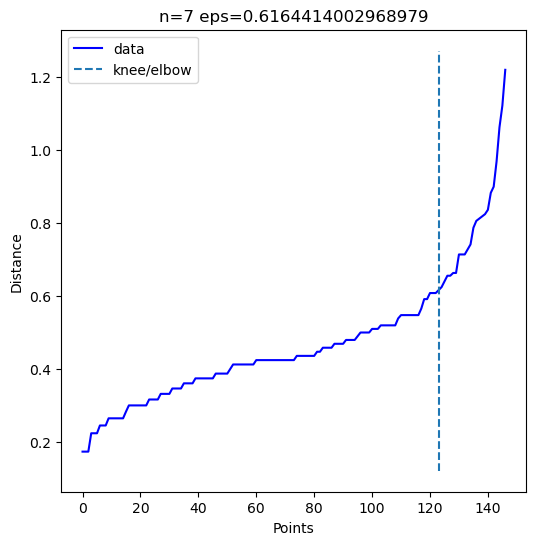

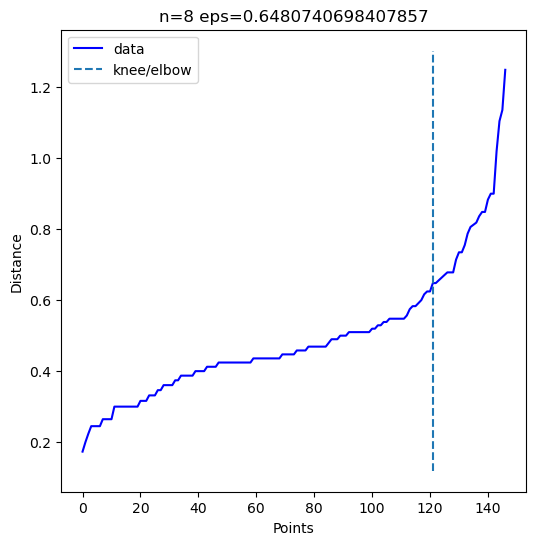

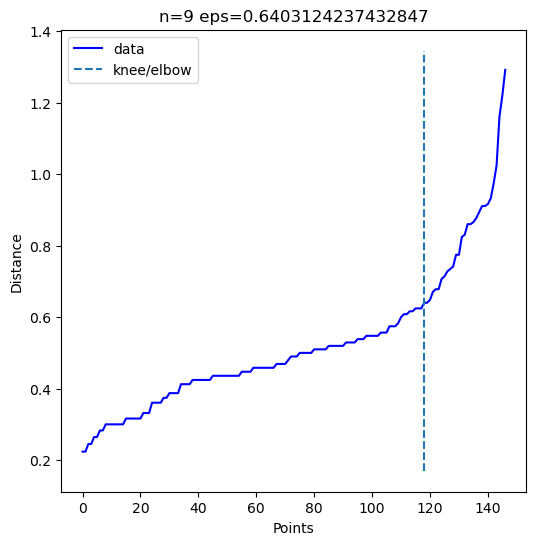

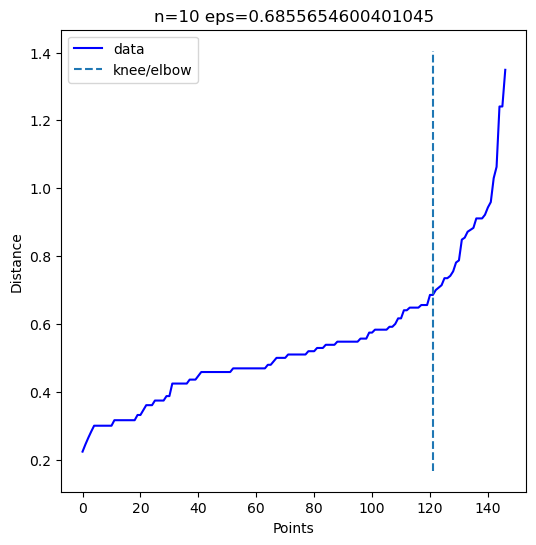

In [16]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
fig = plt.figure(figsize=(30,30))
for j in range(4,11):

 nearest_neighbors = NearestNeighbors(n_neighbors=j)
 neighbors = nearest_neighbors.fit(df_X)
 distances, indices = neighbors.kneighbors(df_X)
 distances = np.sort(distances[:,j-1], axis=0)

 from kneed import KneeLocator 
 i = np.arange(len(distances))

 knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

 knee.plot_knee()
 plt.xlabel("Points")
 plt.ylabel("Distance")
 plt.title(f'n={j} eps={distances[knee.knee]}')

plt.show()
